In [4]:
from duckduckgo_search import DDGS
from fastdownload import download_url
from fastai.data.all import *
from fastai.vision.all import *

In [5]:
ddg = DDGS()
searches = 'woman','man', 'boy', 'girl'
path = Path('woman_or_man')

def search_images(keywords):
  bird_images = ddg.images(
      keywords=keywords,
      max_results=100,
  )
  return [img['image'] for img in bird_images]

In [6]:
for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    resize_images(path/o, max_size=400, dest=path/o)

/Users/nami/anaconda3/envs/LSTM/lib/python3.11/site-packages/PIL/Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/Users/nami/anaconda3/envs/LSTM/lib/python3.11/site-packages/PIL/Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/Users/nami/anaconda3/envs/LSTM/lib/python3.11/site-packages/PIL/Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/Users/nami/anaconda3/envs/LSTM/lib/python3.11/site-packages/PIL/Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


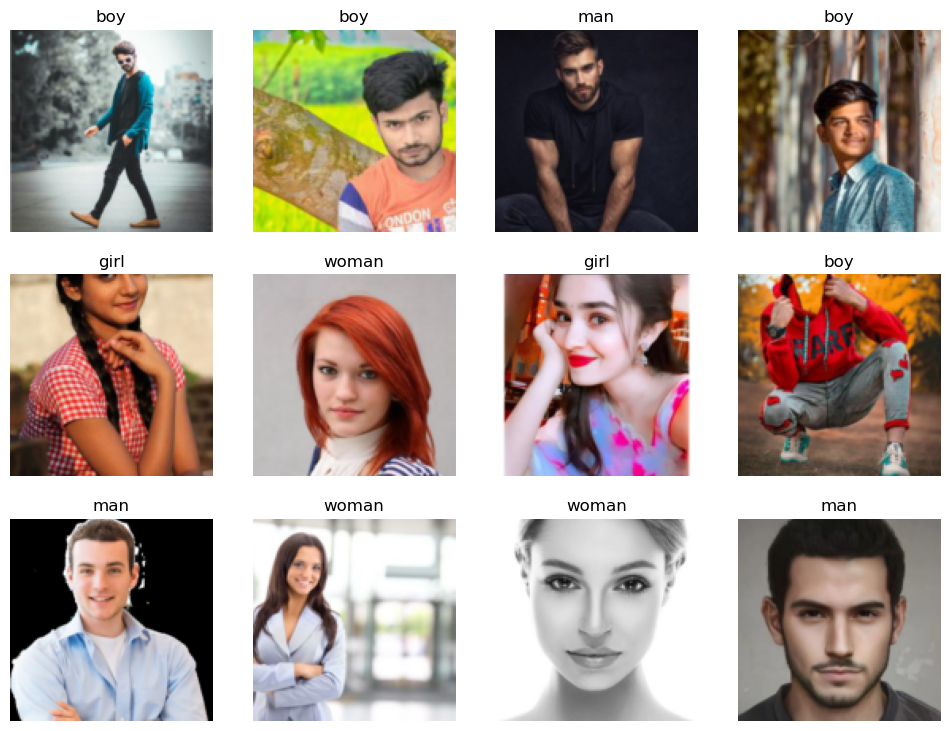

In [7]:
dls = DataBlock(
    # The inputs to our model are images, and the outputs are categories (in this case, "bird" or "forest").
    blocks=(ImageBlock, CategoryBlock),
    # To find all the inputs to our model, run the get_image_files function (which returns a list of all image files in a path).
    get_items=get_image_files,
    # Split the data into training and validation sets randomly, using 20% of the data for the validation set.
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    # The labels (y values) is the name of the parent of each file (i.e. the name of the folder they're in, which will be bird or forest).
    get_y=parent_label,
    # Before training, resize each image to 192x192 pixels by "squishing" it (as opposed to cropping it).
    item_tfms=[Resize(128, method=ResizeMethod.Crop)]
).dataloaders(path)

dls.show_batch(max_n=12)